In [51]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import torch as tor
import matplotlib.pyplot as plt
import numpy as np
from relu_nn.relu_nn import FFReLUNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
# Setup the model
shape = [1, 64, 64, 1]
model = FFReLUNet(shape)
loss_fn = tor.nn.MSELoss()

# Setup the optimizer
lr = 1e-3
num_iters = 2500
opt = tor.optim.Adam(model.parameters(), lr)

# Setup the data
x_min, x_max = -np.pi, np.pi
pha = 3.0
frq = 2.2
amp = 0.5 

num_train = 15000
num_test = 5000

X_train = (x_max - x_min) * tor.randn(num_train) + x_min
Y_train = amp * tor.sin(frq * X_train + pha)
X_train = X_train.reshape(-1, 1, 1)
Y_train = Y_train.reshape(-1, 1, 1)

# Train the model
training_losses = np.zeros((num_iters))
for it in range(num_iters):
    opt.zero_grad()

    Yh = model.forward(X_train)
    
    loss = loss_fn(Y_train, Yh)
    loss.backward()
    training_losses[it] = loss.data.numpy()
    opt.step()
    
    if it % 50 == 0:
        print(loss)

tensor(0.6152, grad_fn=<MseLossBackward>)
tensor(0.1163, grad_fn=<MseLossBackward>)
tensor(0.1086, grad_fn=<MseLossBackward>)
tensor(0.1030, grad_fn=<MseLossBackward>)
tensor(0.0988, grad_fn=<MseLossBackward>)
tensor(0.0956, grad_fn=<MseLossBackward>)
tensor(0.0929, grad_fn=<MseLossBackward>)
tensor(0.0905, grad_fn=<MseLossBackward>)
tensor(0.0883, grad_fn=<MseLossBackward>)
tensor(0.0865, grad_fn=<MseLossBackward>)
tensor(0.0849, grad_fn=<MseLossBackward>)
tensor(0.0834, grad_fn=<MseLossBackward>)
tensor(0.0821, grad_fn=<MseLossBackward>)
tensor(0.0810, grad_fn=<MseLossBackward>)
tensor(0.0793, grad_fn=<MseLossBackward>)
tensor(0.0778, grad_fn=<MseLossBackward>)
tensor(0.0764, grad_fn=<MseLossBackward>)
tensor(0.0749, grad_fn=<MseLossBackward>)
tensor(0.0735, grad_fn=<MseLossBackward>)
tensor(0.0721, grad_fn=<MseLossBackward>)
tensor(0.0708, grad_fn=<MseLossBackward>)
tensor(0.0696, grad_fn=<MseLossBackward>)
tensor(0.0685, grad_fn=<MseLossBackward>)
tensor(0.0676, grad_fn=<MseLossBac

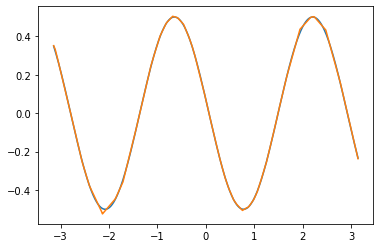

In [83]:
X_test = tor.linspace(x_min, x_max, num_train)
Y_test = amp * tor.sin(frq * X_test + pha)
X_test = X_test.reshape(-1, 1, 1)
Y_test = Y_test.reshape(-1, 1, 1)

Y_pred = model.forward(X_test)

fig = plt.figure()
plt.plot(X_test.numpy().flatten(), Y_test.numpy().flatten())
plt.plot(X_test.numpy().flatten(), Y_pred.detach().numpy().flatten())

fig.show()